## Multi-quantile idea. the scaling for background is different from scaling for signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from microssim import MicroSSIM, MicroMS3IM
from disentangle.core.tiff_reader import load_tiff

debug_mode = True

gt_path = '/group/jug/ashesh/ri_ssim/gt-N2V-2402-31.tif'
pred_path = '/group/jug/ashesh/ri_ssim/pred-N2V-2402-31.tif'
noisy_gt_path = '/group/jug/ashesh/data/ventura_gigascience/actin-60x-noise2-lowsnr.tif'

# gt_path = '/group/jug/ashesh/ri_ssim/gt-N2V-2402-29.tif'
# pred_path = '/group/jug/ashesh/ri_ssim/pred-N2V-2402-29.tif'
# noisy_gt_path = '/group/jug/ashesh/data/ventura_gigascience/mito-60x-noise2-lowsnr.tif'

# denoiSplit
# gt_path = '/group/jug/ashesh/downloads/Actin_HighSNR.tif'
# pred_path = '/group/jug/ashesh/downloads/Actin_pred.tif'
# noisy_gt_path = gt_path

# gt_path = '/group/jug/ashesh/downloads/Mito_HighSNR.tif'
# pred_path = '/group/jug/ashesh/downloads/Mito_pred.tif'
# noisy_gt_path = gt_path

gt = load_tiff(gt_path)
pred = load_tiff(pred_path)
gt_lowsnr = load_tiff(noisy_gt_path)


In [2]:
idx = 0
gt_img = gt[idx]
pred_img = pred[idx]
gt_lowsnr_img = gt_lowsnr[idx]

In [3]:
q_values = np.linspace(0.005, 0.995, 10)

In [4]:
from skimage.measure import block_reduce

gt_img_dwn = block_reduce(gt_img, block_size=(8,8), func=np.mean)
pred_img_dwn = block_reduce(pred_img, block_size=(8,8), func=np.mean)

scaling_factors = []
for i in range(len(q_values)-1):
    gt_min, gt_max = np.quantile(gt_img_dwn, [q_values[i], q_values[i+1]])
    pred_min, pred_max = np.quantile(pred_img_dwn, [q_values[i], q_values[i+1]])
    print(gt_min, gt_max, pred_min, pred_max)
    scaling_factors.append((gt_max - gt_min) / (pred_max - pred_min))

106.338671875 108.09375 103.16161430180073 103.51982781291008
108.09375 108.90625 103.51982781291008 103.61921247839928
108.90625 109.703125 103.61921247839928 103.7036055892706
109.703125 110.671875 103.7036055892706 103.79598230719566
110.671875 112.078125 103.79598230719566 103.91743804216385
112.078125 117.109375 103.91743804216385 104.1203871935606
117.109375 282.515625 104.1203871935606 104.79878140985966
282.515625 541.74921875 104.79878140985966 106.76720888018608
541.74921875 1078.80703125 106.76720888018608 112.44476195275783


In [5]:
scaling_factors[:10]

[4.899530784209335,
 8.17530547595715,
 9.442417654387343,
 10.48694976136583,
 11.578292291988186,
 24.790692473329234,
 243.82025380812584,
 131.69578135739596,
 94.59318224509869]

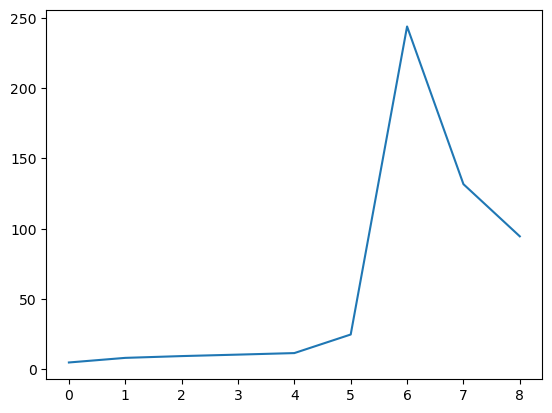

In [6]:
plt.plot(scaling_factors)

In [7]:
a,b= np.quantile(gt_img, q_values[4:6])
b-a

3.0

In [8]:
# bkg_q = q_values[5]

# bkg_gt_min , bkg_gt_max = np.quantile(gt_img_dwn, [0.005, bkg_q])
# bkg_pred_min, bkg_pred_max = np.quantile(pred_img_dwn, [0.005, bkg_q])
# print(bkg_gt_min, bkg_gt_max, bkg_pred_min, bkg_pred_max)
# factor_bkg = (bkg_gt_max - bkg_gt_min) / (bkg_pred_max - bkg_pred_min)
# print(factor_bkg)

# fg_gt_min , fg_gt_max = np.quantile(gt_img_dwn, [bkg_q, 0.995])
# fg_pred_min, fg_pred_max = np.quantile(pred_img_dwn, [bkg_q, 0.995])
# print(fg_gt_min, fg_gt_max, fg_pred_min, fg_pred_max)
# factor_fg = (fg_gt_max - fg_gt_min) / (fg_pred_max - fg_pred_min)
# print(factor_fg)

106.338671875 112.078125 103.16161430180073 103.91743804216385
7.593639652338181
112.078125 1078.80703125 103.91743804216385 112.44476195275783
113.36838102854024


In [13]:
bkg_q = q_values[5]

bkg_gt_min , bkg_gt_max = np.quantile(gt_img_dwn, [0.005, bkg_q])
bkg_pred_min, bkg_pred_max = np.quantile(pred_img_dwn, [0.005, bkg_q])
bkg_gt_mask = np.logical_and(gt_img_dwn > bkg_gt_min, gt_img_dwn < bkg_gt_max)
# bkg_pred_mask = np.logical_and(pred_img_dwn > bkg_pred_min, pred_img_dwn < bkg_pred_max)
print(bkg_gt_min, bkg_gt_max, bkg_pred_min, bkg_pred_max)
factor_bkg = (gt_img_dwn[bkg_gt_mask].mean() - bkg_gt_min) / (pred_img_dwn[bkg_gt_mask].mean() - bkg_pred_min)
print(factor_bkg)

fg_gt_min , fg_gt_max = np.quantile(gt_img_dwn, [bkg_q, 0.995])
fg_pred_min, fg_pred_max = np.quantile(pred_img_dwn, [bkg_q, 0.995])
fg_gt_mask = np.logical_and(gt_img_dwn > fg_gt_min, gt_img_dwn < fg_gt_max)
print(fg_gt_min, fg_gt_max, fg_pred_min, fg_pred_max)
factor_fg = (gt_img_dwn[fg_gt_mask].mean() -bkg_gt_min)  / (pred_img_dwn[fg_gt_mask].mean() - bkg_pred_min)
print(factor_fg)

106.338671875 112.078125 103.16161430180073 103.91743804216385
4.8559468450023795
112.078125 1078.80703125 103.91743804216385 112.44476195275783
106.5448891666154


In [93]:
# bkg_mask = pred_img <= bkg_pred_max
# fg_mask = pred_img > bkg_pred_max
# scaled_pred = pred_img.copy()
# scaled_pred[bkg_mask] = scaled_pred[bkg_mask] * factor_bkg
# scaled_pred[fg_mask] = scaled_pred[fg_mask] * factor_fg

# pred_ssim = scaled_pred - np.quantile(scaled_pred, 0.03)
# gt_ssim = gt_img - np.quantile(gt_img, 0.03)

# pred_ssim[pred_ssim < 0] = 0
# gt_ssim[gt_ssim < 0] = 0

In [23]:
bkg_mask = gt_img <= bkg_gt_max
fg_mask = gt_img > bkg_gt_max
scaled_pred = pred_img.copy()
scaled_pred[bkg_mask] = scaled_pred[bkg_mask] * factor_bkg
scaled_pred[fg_mask] = scaled_pred[fg_mask] * factor_fg

pred_ssim = scaled_pred - np.quantile(scaled_pred, 0.03)
gt_ssim = gt_img - np.quantile(gt_img, 0.03)

gt_ssim = gt_ssim/np.quantile(gt_ssim, 0.995)
pred_ssim = pred_ssim/np.quantile(pred_ssim, 0.995)


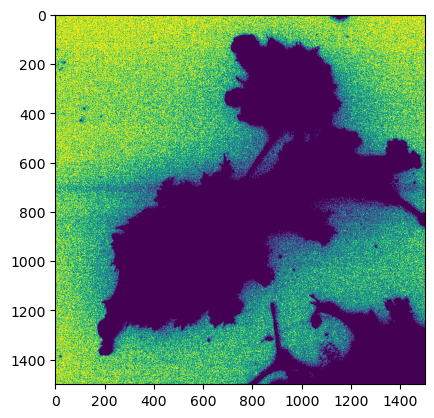

In [24]:
plt.imshow(bkg_mask[:1500,:1500])

In [25]:
from microssim._micro_ssim_internal import micro_SSIM
ssim_dict = micro_SSIM(gt_ssim, pred_ssim, 
                            ri_factor=1.0,
                            data_range=gt_ssim.max() - gt_ssim.min(), return_individual_components=True)
print(ssim_dict['SSIM'].mean())


0.12126214531526407


<Axes: >

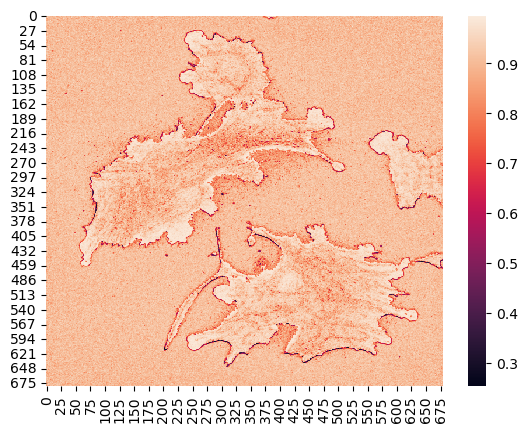

In [28]:
import seaborn as sns
sns.heatmap(ssim_dict['structure'][::3, ::3])

In [21]:
ssim_dict['SSIM'][fg_mask[5:-5,5:-5]].mean()

0.020188678662791126

In [22]:
ssim_dict['SSIM'].mean()

0.010633618447234951